In [ ]:
#1.  Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір). 

#Вирішіть завдання щодо генерації текстів або машинного перекладу. Особливо вітаються україномовні моделі.  

In [23]:
#Генерація тексту

In [43]:
with open('Lys_mykyta.txt', 'r', encoding = "utf-8" ) as file:
    text = file.read().lower()
print('text length', len(text))

chars = sorted(list(set(text))) # getting all unique chars
print('total chars: ', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

text length 86526
total chars:  50


In [44]:
text

"казка.укр - дитячі книги з малюнками \nукраїнською мовою онлайн\nіван франко\nлис микита\nза редакцією максима рильского\nілюстрації – с.артюшенко\n\n\nпісня перша\nнадійшла весна прекрасна,\nмногоцвітна, тепла, ясна,\nмов дівчина у вінку;\nожили луги, діброви,\nповно гамору, розмови\nі пісень в чагарнику.\n\nлев, що цар є над звірами,\nпише листи з печатками,\nрозсилає на весь світ:\nв тих листах велить він строго,\nщоб посходився до нього\nв мить увесь звірячий рід.\n\nось ідуть вони юрбами –\nті безхвості, ті з хвостами.\nвсе, що виє, гавка, квака;\nлиш один мов і не чує,\nв своїм замку, знай, ночує –\nлис микита, розбишака.\n\nой, недаром він сховався!\nпевне, слухать побоявся,\nщо звірячий скаже люд.\nа тим часом у столиці\nцар засів біля цариці,\nщоб творити звірам суд.\n\nперший вийшов вовк неситий:\n– царю, – каже, – від микити\nвже мені хоч пропадать!\nдіток моїх б'є, кусає,\nа вовчицю обмовляє\nтак, що й сором повідать!\n\nа й мене – хіба ж то чесно? –\nяк він хитро і облесн

In [45]:
import numpy as np

maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [47]:
model.fit(x, y, batch_size=128, epochs=5)

Epoch 1/5
226/226 [==============================] - 13s 54ms/step - loss: 2.7819
Epoch 2/5
226/226 [==============================] - 11s 49ms/step - loss: 2.3590
Epoch 3/5
226/226 [==============================] - 10s 42ms/step - loss: 2.1932
Epoch 4/5
226/226 [==============================] - 10s 43ms/step - loss: 2.0634
Epoch 5/5
226/226 [==============================] - 9s 42ms/step - loss: 1.9498


In [48]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [49]:
def generate_text(length, diversity):
    # Get random starting text
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    for i in range(length):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char
    return generated

In [50]:
print(generate_text(500, 0.2))

 новий товар.

зирк – свиня лежить в калака,
та почив світ за нам світ.

– на в довори мене зай,
та погону в світив світ.

не там кові в світився
та почав за світився
мав баче в світився зався
і не за в від не звір!

– най там судив за світився,
в тік не за в віди не зала,
та погоди не за світий,
та погодив за попину,
та почав силино з став.

не та в баре, мов ти за вміх.

не повів на сміло в ні.

дав багай, скарб не знай,
та на мій на за світий,
да повів за пів на світ.

не й дав не за в крику мій,
що повів я в не завий,
та повів на 


In [52]:
#2. Проведіть експерименти з моделями бібліотеки HF Transformers (https://huggingface.co/) за допомогою (наприклад) Pipeline модуля
#Знайдіть українські мовні моделі, наведіть приклади роботи з ними. 

from transformers import pipeline

pipe = pipeline("text-classification", model="YaraKyrychenko/ukraine-war-pov") #модель класифікує текст як проукраїнський або проросійський

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [53]:
pipe("Путін, врятуй нас! Янукович наш президент!")# :)

[{'label': 'proukrainian', 'score': 0.9883274435997009}]

In [58]:
pipe("Путин, спаси нас! Янукович наш президент!")# схоже, реагує на мову

[{'label': 'prorussian', 'score': 0.984654426574707}]

In [54]:
pipe("Росіяни незаконно анексували Крим")# :)

[{'label': 'proukrainian', 'score': 0.9953598380088806}]

In [60]:
pipe("Россия незаконно анексировала Крым")# так, модель реагує на мову, а не аналізує суть тексту.

[{'label': 'prorussian', 'score': 0.9708219170570374}]

In [ ]:
#3. Завдання щодо генерації або стилізації зображень (на вибір)

#Вирішіть завдання перенесення стилю або генерації зображень (архітектура за вашим вибором: GAN/DCGAN/VAE).

In [107]:
#Перенесення стилю  

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf
from keras.applications import vgg19

base_image = keras.utils.load_img("london.jpg")
style_reference_image = keras.utils.load_img(
    "space.jpg")

# Weights of the different loss components
total_variation_weight = 1e-6
style_weight = 1e-6
content_weight = 2.5e-8

# Dimensions of the generated picture.
width, height =base_image.size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

In [108]:
img_ncols

761

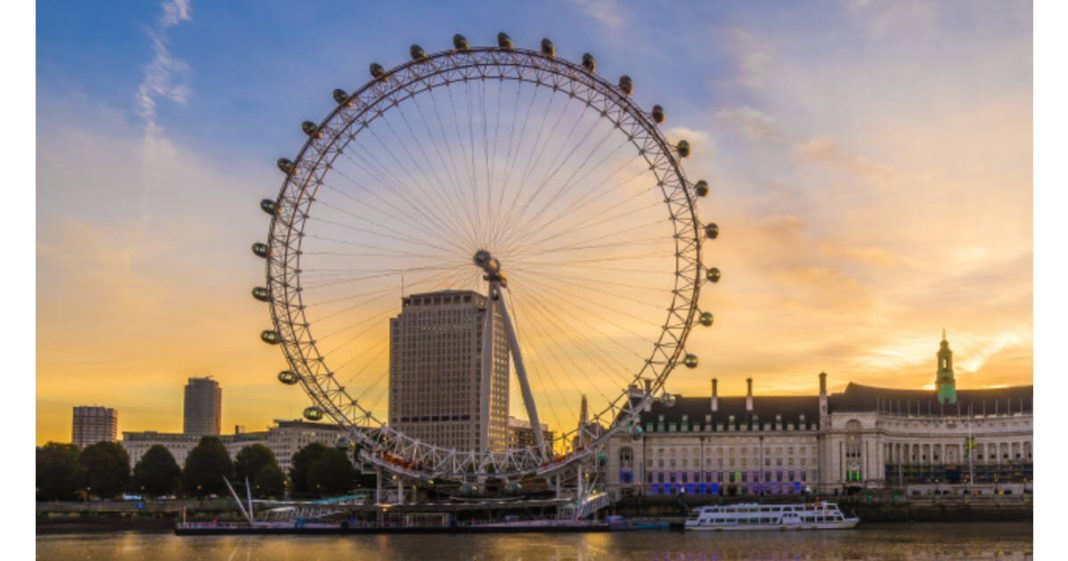

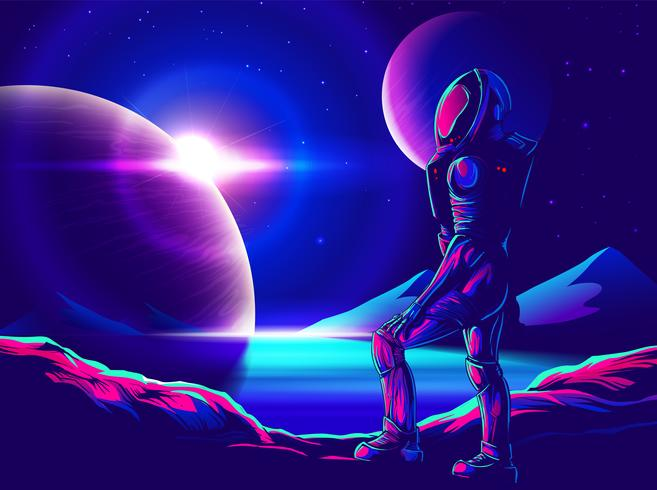

In [109]:
from IPython.display import display, Image

display(base_image)
display(style_reference_image)

In [80]:
def preprocess_image(image):
    img = keras.utils.load_img(image_path, target_size=(img_nrows, img_ncols))
    img = keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return tf.convert_to_tensor(img)


def deprocess_image(x):
    x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x


In [81]:
def gram_matrix(x):
    x = tf.transpose(x, (2, 0, 1))
    features = tf.reshape(x, (tf.shape(x)[0], -1))
    gram = tf.matmul(features, tf.transpose(features))
    return gram

def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels**2) * (size**2))

def content_loss(base, combination):
    return tf.reduce_sum(tf.square(combination - base))

def total_variation_loss(x):
    a = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, 1:, : img_ncols - 1, :]
    )
    b = tf.square(
        x[:, : img_nrows - 1, : img_ncols - 1, :] - x[:, : img_nrows - 1, 1:, :]
    )
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [82]:
# Build a VGG19 model loaded with pre-trained ImageNet weights
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

In [83]:
style_layer_names = [
    "block1_conv1",
    "block2_conv1",
    "block3_conv1",
    "block4_conv1",
    "block5_conv1",
]
# The layer to use for the content loss.
content_layer_name = "block5_conv2"


def compute_loss(combination_image, base_image, style_reference_image):
    input_tensor = tf.concat(
        [base_image, style_reference_image, combination_image], axis=0
    )
    features = feature_extractor(input_tensor)

    # Initialize the loss
    loss = tf.zeros(shape=())

    # Add content loss
    layer_features = features[content_layer_name]
    base_image_features = layer_features[0, :, :, :]
    combination_features = layer_features[2, :, :, :]
    loss = loss + content_weight * content_loss(
        base_image_features, combination_features
    )
    # Add style loss
    for layer_name in style_layer_names:
        layer_features = features[layer_name]
        style_reference_features = layer_features[1, :, :, :]
        combination_features = layer_features[2, :, :, :]
        sl = style_loss(style_reference_features, combination_features)
        loss += (style_weight / len(style_layer_names)) * sl

    # Add total variation loss
    loss += total_variation_weight * total_variation_loss(combination_image)
    return loss

In [84]:
@tf.function #converts regular python code to a callable Tensorflow graph function
def compute_loss_and_grads(combination_image, base_image, style_reference_image):
    with tf.GradientTape() as tape:
        loss = compute_loss(combination_image, base_image, style_reference_image)
    grads = tape.gradient(loss, combination_image)
    return loss, grads

In [105]:
optimizer = keras.optimizers.SGD(
    keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96
    )
)

base_image = preprocess_image("london.jpg")
style_reference_image = preprocess_image("space.jpg")
combination_image = tf.Variable(preprocess_image("london.jpg"))

iterations = 50
for i in range(1, iterations + 1):
    loss, grads = compute_loss_and_grads(
        combination_image, base_image, style_reference_image
    )
    optimizer.apply_gradients([(grads, combination_image)])
    if i % 1 == 0:
        print("Iteration %d: loss=%.2f" % (i, loss))
        img = deprocess_image(combination_image.numpy())
        fname = "image_at_iteration_%d.png" % i
        keras.utils.save_img(fname, img)

Iteration 1: loss=125581.54
Iteration 2: loss=119706.84
Iteration 3: loss=108363.57
Iteration 4: loss=97351.74
Iteration 5: loss=87039.32
Iteration 6: loss=77599.20
Iteration 7: loss=69093.73
Iteration 8: loss=62629.30
Iteration 9: loss=56589.76
Iteration 10: loss=51847.14
Iteration 11: loss=47786.19
Iteration 12: loss=44461.08
Iteration 13: loss=41774.10
Iteration 14: loss=39360.55
Iteration 15: loss=37222.41
Iteration 16: loss=35426.78
Iteration 17: loss=33852.32
Iteration 18: loss=32541.56
Iteration 19: loss=31257.17
Iteration 20: loss=30094.33
Iteration 21: loss=29012.42
Iteration 22: loss=28011.86
Iteration 23: loss=27094.96
Iteration 24: loss=26269.65
Iteration 25: loss=25579.64
Iteration 26: loss=24976.85
Iteration 27: loss=24465.41
Iteration 28: loss=23999.76
Iteration 29: loss=23580.62
Iteration 30: loss=23174.30
Iteration 31: loss=22789.71
Iteration 32: loss=22420.82
Iteration 33: loss=22075.57
Iteration 34: loss=21729.15
Iteration 35: loss=21414.54
Iteration 36: loss=21118.0

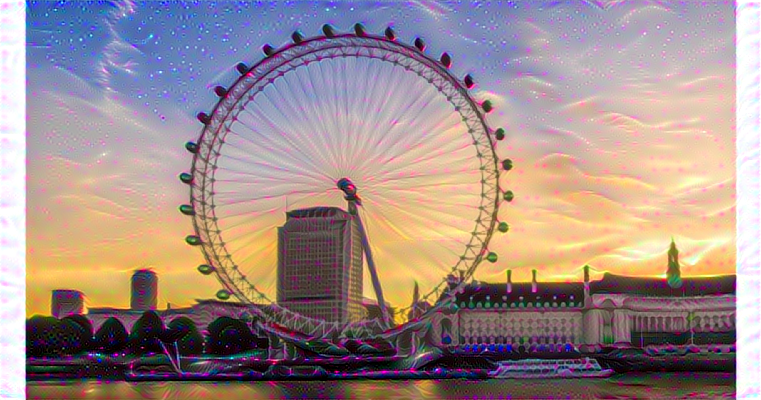

In [106]:
display(Image("image_at_iteration_50.png"))